### Consumo de Cerveja em São Paulo

Saaalve galera, este é um notebook de alguns teste e aplicações de modelos de Regressão para prever o consumo de cerveja na cidade de São Paulo. Aqui a idéia é aplicar alguns modelos simples somente à titulo de testes.  


#### Índice:

* 1. [Importando Pacotes](#1.-Importando-as-Bibliotecas)
* 2. [Data Processing](#2.-Tratamento-dos-Dados-e-Funções)
* 3. [Analise Exploratória dos Dados](#3.-Analise-Exploratória-dos-Dados)
* 4. [Pré Processamento](#4.-Pré-Processamento)
* 5. [Modelos](#5.-Modelos)

    * 5.1 [Regressão Linear Simples com Temp. Média](#5.1-Regressão-Linear-Simples-com-Temp.-Média)
    * 5.2 [Regressão Linear Simples com Temp. Maxima](#5.2-Regressão-Linear-Simples-com-Temp.-Maxima)
    * 5.3 [Regressão Linear Simples com Temp. Minima](#5.3-Regressão-Linear-Simples-com-Temp.-Minima)
    * 5.4 [Regressão Linear Múltipla](#5.4-Regressão-Linear-Múltipla)
    * 5.5 [Regressão Linear Múltipla sem precipitação](#5.5-Regressão-Linear-Múltipla-sem-precipitação)
    * 5.6 [Suport Vector Machine ](#5.6-Suport-Vector-Machine)
    * 5.7 [Decision Tree Regressor](#5.7-Decision-Tree-Regressor)
    * 5.8 [Random Forest Regressor](#5.8-Random-Forest-Regressor)


* 6. [Resultados](#6.-Resultados)

### 1. Importando as Bibliotecas

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Metricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

# Pré Processamento e Modelagem
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split


In [10]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large' }
plt.rcParams.update(params)
plt.style.use(['seaborn'])

In [11]:
# Importando a base
path = r'data\Consumo_cerveja.csv'
df   = pd.read_csv(path, delimiter=',', decimal = ',', thousands = '.')

df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0


### 2. Tratamento dos Dados e Funções

In [12]:
# Tratamento dos Dados

# Valor Datetime na coluna Data
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

# Tirando todas as observações com valores nulos
df = df.dropna(how='all')

#df.info()
#df.head()
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


In [13]:
modelos = []

In [14]:
# Função de avaliação de Modelos de Regressão Linear Simples

# Queremos focar nas métricas 
# R²: pela sua interpretabilidade ( por estar entre 0 e 1) 
# RSME: ( pois mensura em valores o erro médio)

def resultados_regressao(y_pred, y_real, nome_modelo , tipo):
        
    R_2  =  r2_score(y_real,y_pred)
    mse  =  mean_squared_error(y_real, y_pred, squared = False) 
    rmse =  mse **0.5
    MAE  =  mean_absolute_error(y_real,y_pred)

    
    print('R²   : ', R_2  )
    print('MSE  : ', mse  )
    print('RMSE : ', rmse )
    print('MAE  : ', MAE  )
    
    dicionario = {
        'Modelo': nome_modelo,
        'R²': R_2,
        'MSE': mse,
        'RMSE':rmse ,
        'MAE': MAE 
    }
    modelos.append(dicionario)
    
 
    if tipo == 'Simples':
    
        fig, ax = plt.subplots(figsize=(14, 6))

        sns.scatterplot(x = X_test.iloc[:,0],y =  y_test['Consumo de cerveja (litros)'],  edgecolor='k', facecolor='grey', alpha=0.7)
        plt.plot(X_test,y_pred  , color='red', linewidth=2, label = 'Reta da Regressão')
        plt.title("Base Teste - Predição da "+nome_modelo )
        plt.legend()
        plt.show()

### 3. EDA


In [15]:
df.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


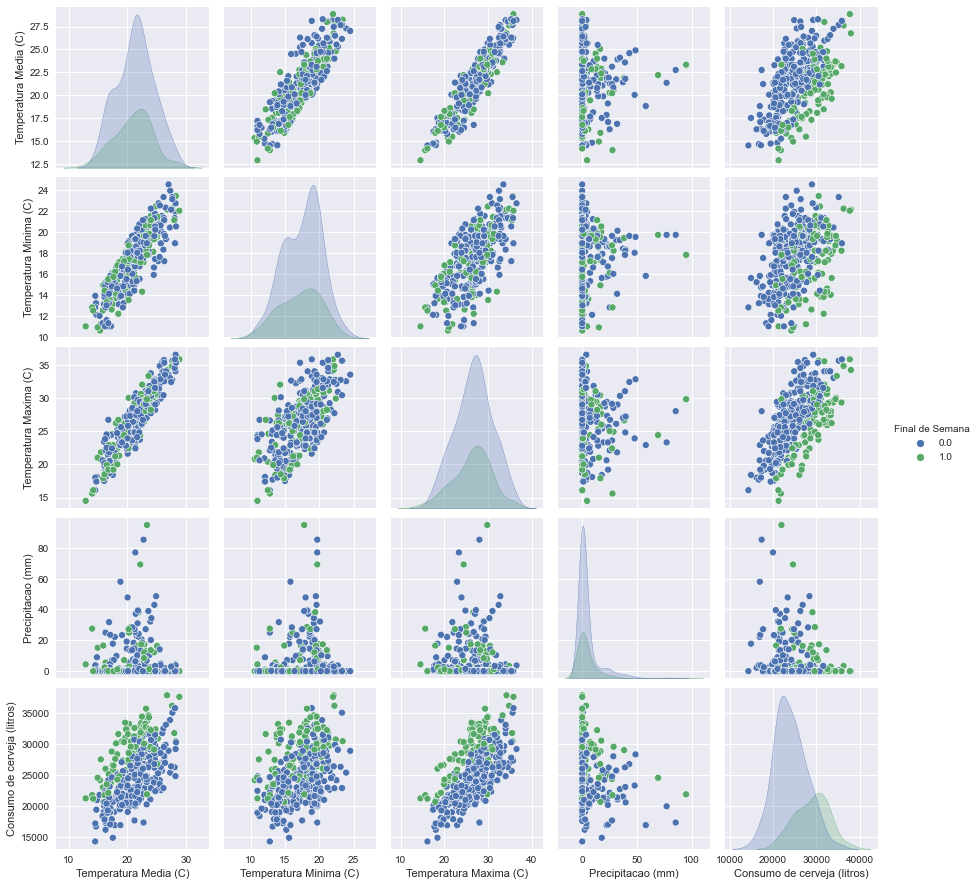

In [16]:
sns.pairplot(df, hue = 'Final de Semana');

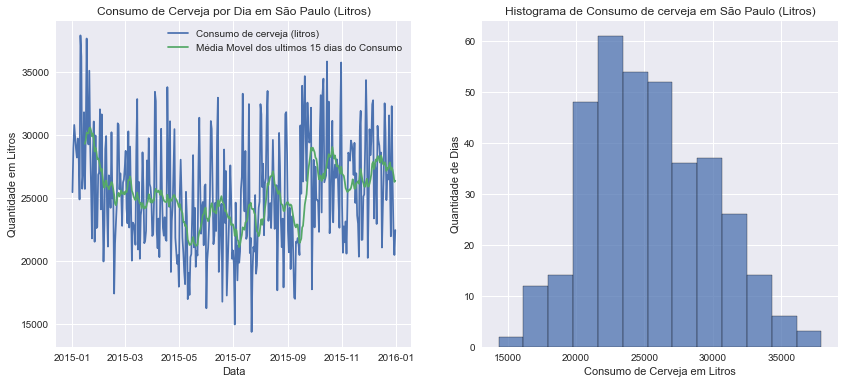

In [17]:
temp = df.copy()
temp['media_movel'] = temp.iloc[:,-1].rolling(window=15).mean()
temp['media_movel_temperatura'] = temp.iloc[:,1].rolling(window=15).mean()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data = temp, y= "Consumo de cerveja (litros)", x = 'Data',ax = ax[0], legend= True)
sns.lineplot(data = temp, y= "media_movel", x = 'Data',ax = ax[0], legend= True)
ax[0].legend(['Consumo de cerveja (litros)', 'Média Movel dos ultimos 15 dias do Consumo'])

ax[0].set(xlabel="Data",
       ylabel="Quantidade em Litros",
       title="Consumo de Cerveja por Dia em São Paulo (Litros)");

sns.histplot(data = df, x= "Consumo de cerveja (litros)",ax = ax[1], legend= True)
ax[1].set(xlabel="Consumo de Cerveja em Litros",
       ylabel="Quantidade de Dias",
       title="Histograma de Consumo de cerveja em São Paulo (Litros)");

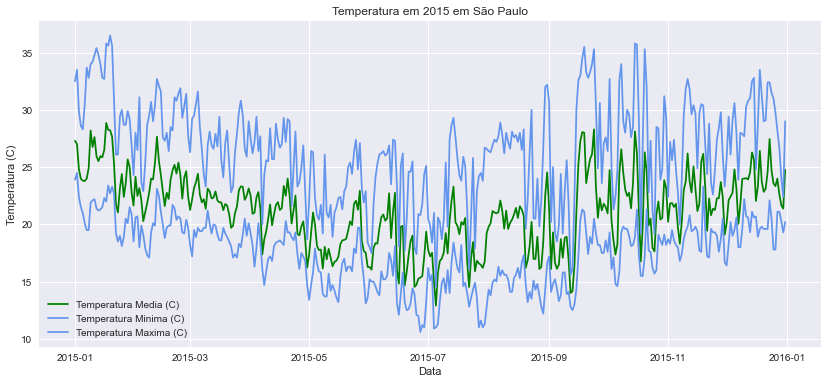

In [18]:
# Grafico da correlação entre teperatura e consumo


fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data = temp, y= "Temperatura Media (C)", x = 'Data', color = 'green')
sns.lineplot(data = temp, y= "Temperatura Minima (C)", x = 'Data', color = 'cornflowerblue')
sns.lineplot(data = temp, y= "Temperatura Maxima (C)", x = 'Data', color = 'cornflowerblue');
ax.legend(['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)'])


ax.set(xlabel="Data",
       ylabel="Temperatura (C)",
       title="Temperatura em 2015 em São Paulo");

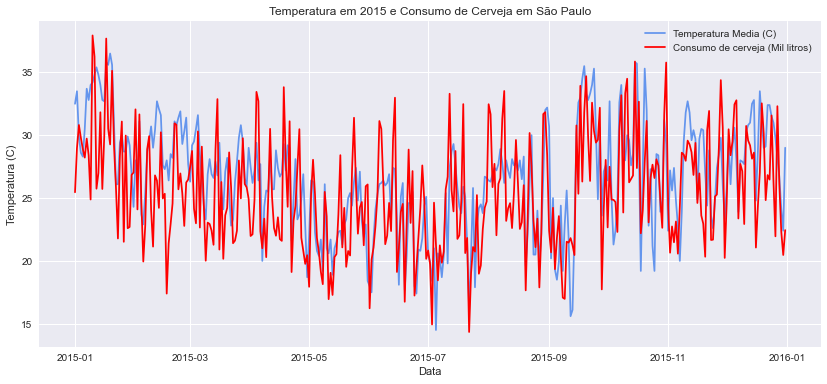

In [19]:
# Grafico da correlação entre teperatura e consumo

temp = df.copy()
temp['Consumo de cerveja (litros)'] = temp['Consumo de cerveja (litros)']/1000

fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data = temp, y= "Temperatura Maxima (C)", x = 'Data', color = 'cornflowerblue');
sns.lineplot(data = temp, y= "Consumo de cerveja (litros)", x = 'Data', color = 'red');
ax.legend(['Temperatura Media (C)', 'Consumo de cerveja (Mil litros)'])


ax.set(xlabel="Data",
       ylabel="Temperatura (C)",
       title="Temperatura em 2015 e Consumo de Cerveja em São Paulo");

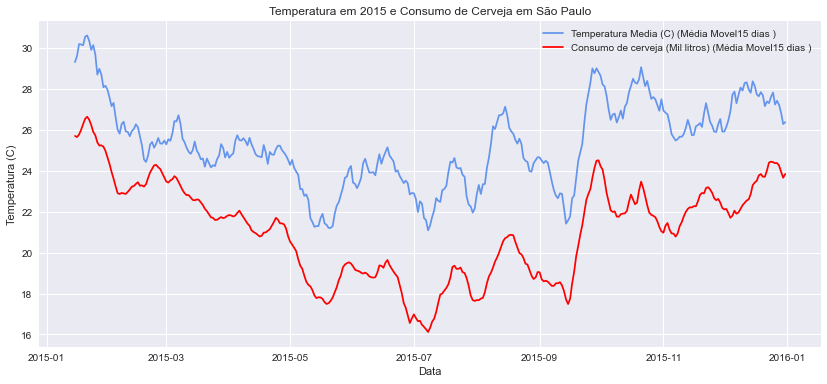

In [20]:
# Grafico da correlação entre teperatura e consumo
janela_media_movel = 15

temp = df.copy()
temp['Consumo de cerveja (litros)'] = temp['Consumo de cerveja (litros)']/1000
temp['media_movel'] = temp.iloc[:,-1].rolling(window=janela_media_movel).mean()
temp['media_movel_temperatura'] = temp.iloc[:,1].rolling(window=janela_media_movel).mean()

fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data = temp, y= "media_movel", x = 'Data', legend= True, color = 'cornflowerblue');
sns.lineplot(data = temp, y= "media_movel_temperatura", x = 'Data', legend= True, color = 'red');

ax.legend(['Temperatura Media (C) (Média Movel' + str(janela_media_movel)+' dias )' 
           , 'Consumo de cerveja (Mil litros) (Média Movel'+ str(janela_media_movel)+' dias )'])


ax.set(xlabel="Data",
       ylabel="Temperatura (C)",
       title="Temperatura em 2015 e Consumo de Cerveja em São Paulo");

Interessante notar que a média móvel da temperatura média e do consumo de cerveja seguem um mesmo padrão na série temporal, não é parte do escopo da nossa idéia aqui mas pode ser interessante para um segundo projeto tentar prever o consumo com base em séries temporais.

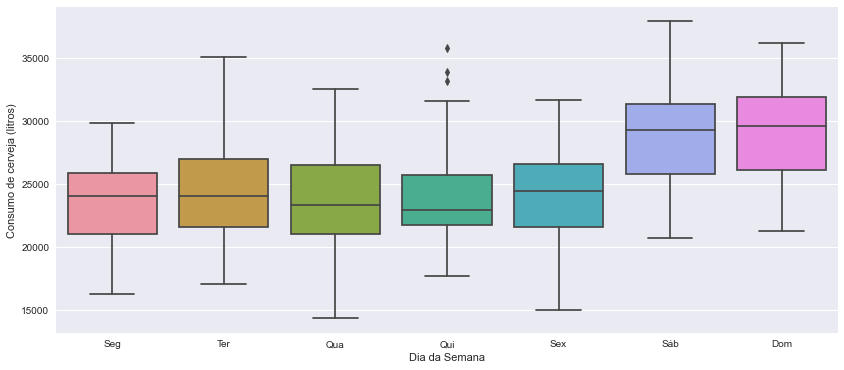

In [21]:
# Busca o dia da semana equivalente ao dia
df['Dia da Semana'] = df['Data'].dt.dayofweek

# Boxplot do consumo por dia da semana
fig, ax = plt.subplots( figsize=(14, 6))
sns.boxplot( y="Consumo de cerveja (litros)",x= 'Dia da Semana', data=df)
ax.set_xticklabels( ('Seg', 'Ter','Qua', 'Qui', 'Sex', 'Sáb', 'Dom') );

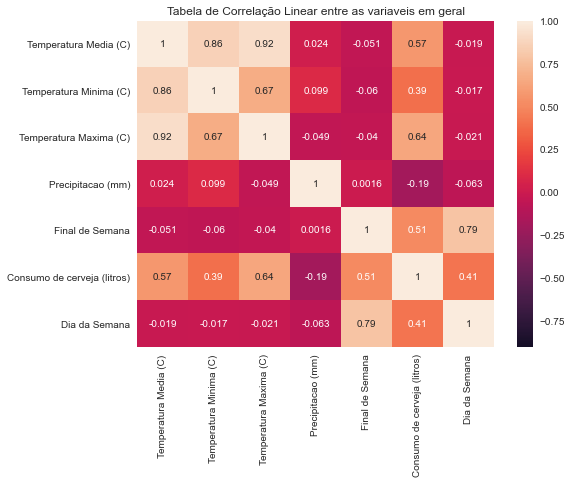

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(df.corr(), annot = True, center=0,  cmap="rocket", vmin=-0.9, vmax=1)
ax.set(title="Tabela de Correlação Linear entre as variaveis em geral");

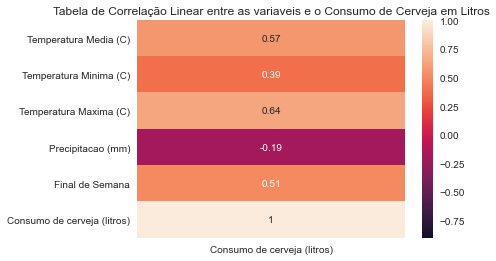

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(df.corr().iloc[0:-1,5:-1], annot = True, center=0,  cmap="rocket", vmin=-0.9, vmax=1)
ax.set(title="Tabela de Correlação Linear entre as variaveis e o Consumo de Cerveja em Litros");

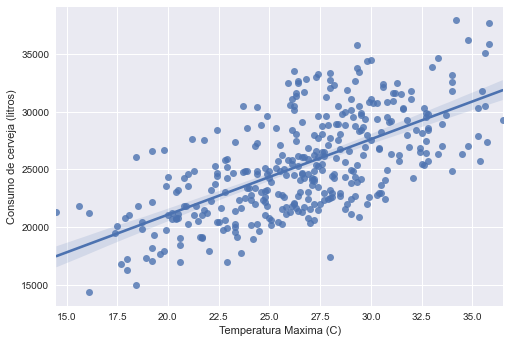

In [24]:
sns.regplot(x="Temperatura Maxima (C)", y="Consumo de cerveja (litros)", data=df);

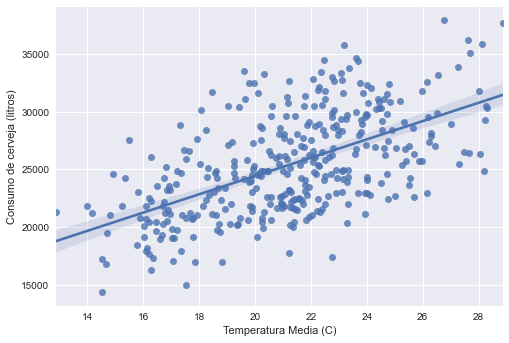

In [25]:
sns.regplot(x="Temperatura Media (C)", y="Consumo de cerveja (litros)", data=df);

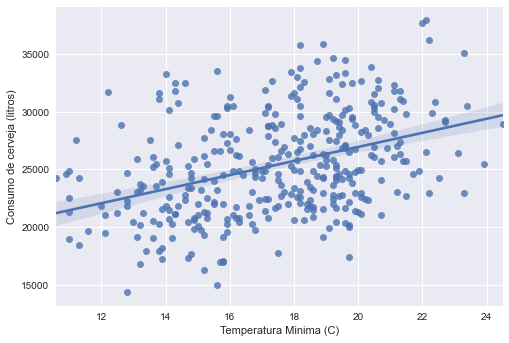

In [26]:
sns.regplot(x="Temperatura Minima (C)", y="Consumo de cerveja (litros)", data=df);

### 4. Pré Processamento


In [28]:
# Importando a base
path = r'data\Consumo_cerveja.csv'
df   = pd.read_csv(path, delimiter=',', decimal = ',', thousands = '.')

df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25461.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28972.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30814.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29799.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28900.0


In [29]:
# Tratamento dos Dados

# Tirando todas as observações com valores nulos
df = df.dropna(how='all')

# Valor Datetime na coluna Data
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

# Busca o dia da semana equivalente ao dia
df['Dia da Semana'] = df['Data'].dt.dayofweek

# Transforma a coluna do dia da semana em dummies
df['Dia da Semana'] = df['Dia da Semana'].astype(str).replace({'0': 'Seg','1': 'Ter','2': 'Qua','3': 'Qui','4': 'Sex','5': 'Sáb','6': 'Dom'})
df = pd.get_dummies(df, columns = ['Dia da Semana'])

# Para o problema de regressão não nos interessa a coluna Data
df.drop('Data', axis = 1, inplace = True)

df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Dia da Semana_Dom,Dia da Semana_Qua,Dia da Semana_Qui,Dia da Semana_Seg,Dia da Semana_Sex,Dia da Semana_Sáb,Dia da Semana_Ter
0,27.30,23.9,32.5,0.0,0.0,25461.0,0,0,1,0,0,0,0
1,27.02,24.5,33.5,0.0,0.0,28972.0,0,0,0,0,1,0,0
2,24.82,22.4,29.9,0.0,1.0,30814.0,0,0,0,0,0,1,0
3,23.98,21.5,28.6,1.2,1.0,29799.0,1,0,0,0,0,0,0
4,23.82,21.0,28.3,0.0,0.0,28900.0,0,0,0,1,0,0,0


Agora estamos prontos para aplicar os modelos nos dados.

### 5. Modelos


#### 5.1 Regressão Linear Simples com Temp. Média

A reta treinada para a Regressão Linear é: y =  7695.418669878174 + X* 826.9816484503629 

R²   :  0.1138734613763045
MSE  :  3855.083794370336
RMSE :  62.08932109767618
MAE  :  3160.2221366021877


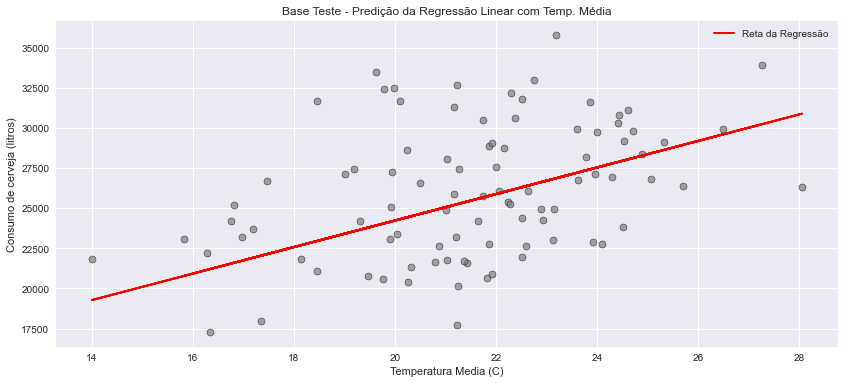

In [30]:
# Definindo as variaveis

X = df[['Temperatura Media (C)']]
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = LinearRegression()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)

print("A reta treinada para a Regressão Linear é: y = ", regressor.intercept_[0], "+ X*",regressor.coef_[0][0], '\n' )

resultados_regressao(y_pred, y_test, 'Regressão Linear com Temp. Média', 'Simples')


#### 5.2 Regressão Linear Simples com Temp. Maxima

A reta treinada para a Regressão Linear é: y =  7714.523207666738 + X* 659.613256410158 

R²   :  0.261886961001113
MSE  :  3518.4176390641246
RMSE :  59.31625105368785
MAE  :  2837.74772698188


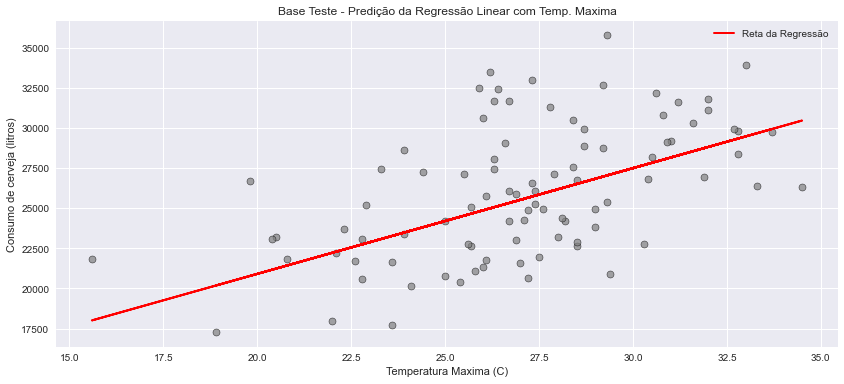

In [31]:
# Definindo as variaveis

X = df[['Temperatura Maxima (C)']]
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = LinearRegression()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)

print("A reta treinada para a Regressão Linear é: y = ", regressor.intercept_[0], "+ X*",regressor.coef_[0][0], '\n' )

resultados_regressao(y_pred, y_test, 'Regressão Linear com Temp. Maxima', 'Simples')

#### 5.3 Regressão Linear Simples com Temp. Minima


A reta treinada para a Regressão Linear é: y =  12979.618457346252 + X* 701.0502372478719 

R²   :  -0.10073176328810973
MSE  :  4296.617570050012
RMSE :  65.54858938260999
MAE  :  3470.72351411229


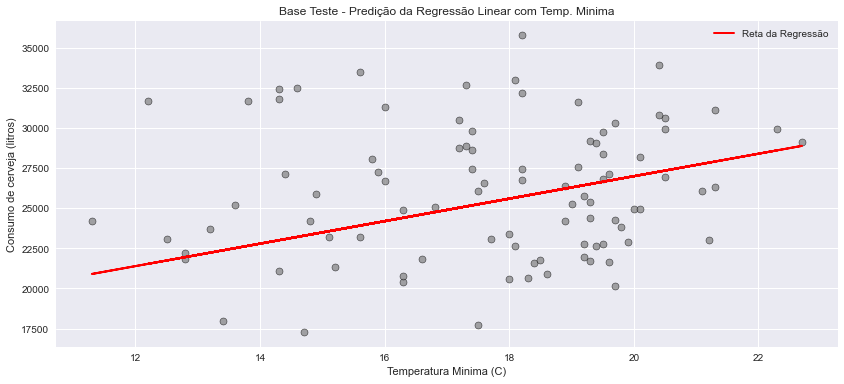

In [32]:
# Definindo as variaveis

X = df[['Temperatura Minima (C)']]
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = LinearRegression()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)

print("A reta treinada para a Regressão Linear é: y = ", regressor.intercept_[0], "+ X*",regressor.coef_[0][0], '\n' )

resultados_regressao(y_pred, y_test, 'Regressão Linear com Temp. Minima', 'Simples')

#### 5.4 Regressão Linear Múltipla

In [33]:
######## Treinando o Modelo

# Definindo as variaveis

X = df.drop(['Consumo de cerveja (litros)'], axis = 1)
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = LinearRegression()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)

In [34]:
print("A reta treinada para a Regressão Multipla é:\n y = ",round(regressor.intercept_[0], 2) , 
      "+ (Temperatura Media (C))*",round(regressor.coef_[0][0], 2), 
      "+ (Temperatura Minima (C))*",round(regressor.coef_[0][1], 2),
      "+ (Temperatura Maxima (C))*",round(regressor.coef_[0][2], 2),
      "+ (Final de Semana)*",round(regressor.coef_[0][3], 2),
      "+ (Dia da Semana_Dom)*",round(regressor.coef_[0][4], 2),
      "+ (Dia da Semana_Qua)*",round(regressor.coef_[0][5], 2),
      "+ (Dia da Semana_Qui)*",round(regressor.coef_[0][6], 2),
      "+ (Dia da Semana_Seg)*",round(regressor.coef_[0][7], 2),
      "+ (Dia da Semana_Sex)*",round(regressor.coef_[0][8], 2),
      "+ (Dia da Semana_Sáb)*",round(regressor.coef_[0][9], 2),
      "+ (Dia da Semana_Sex)*",round(regressor.coef_[0][10], 2),
      '\n' )

# Plotando as métricas

resultados_regressao(y_pred, y_test, 'Regressão Linear Múltipla sem padronização', 'Múltipla')

A reta treinada para a Regressão Multipla é:
 y =  7137.53 + (Temperatura Media (C))* 127.56 + (Temperatura Minima (C))* -54.96 + (Temperatura Maxima (C))* 597.25 + (Final de Semana)* -61.3 + (Dia da Semana_Dom)* 3031.15 + (Dia da Semana_Qua)* 1824.34 + (Dia da Semana_Qui)* -758.64 + (Dia da Semana_Seg)* -843.89 + (Dia da Semana_Sex)* -690.55 + (Dia da Semana_Sáb)* -392.97 + (Dia da Semana_Sex)* 1206.8 

R²   :  0.6450585288138941
MSE  :  2439.856719468042
RMSE :  49.39490580483014
MAE  :  2117.3564399069214


#### 5.5 Regressão Linear Múltipla sem precipitação

In [35]:
######## Treinando o Modelo

# Definindo as variaveis

X = df.drop(['Consumo de cerveja (litros)', 'Precipitacao (mm)'], axis = 1)
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = LinearRegression()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)

In [36]:
print("A reta treinada para a Regressão Multipla é:\n y = ",round(regressor.intercept_[0], 2) , 
      "+ (Temperatura Media (C))*",round(regressor.coef_[0][0], 2), 
      "+ (Temperatura Minima (C))*",round(regressor.coef_[0][1], 2),
      "+ (Temperatura Maxima (C))*",round(regressor.coef_[0][2], 2),
      "+ (Final de Semana)*",round(regressor.coef_[0][3], 2),
      "+ (Dia da Semana_Dom)*",round(regressor.coef_[0][4], 2),
      "+ (Dia da Semana_Qua)*",round(regressor.coef_[0][5], 2),
      "+ (Dia da Semana_Qui)*",round(regressor.coef_[0][6], 2),
      "+ (Dia da Semana_Seg)*",round(regressor.coef_[0][7], 2),
      "+ (Dia da Semana_Sex)*",round(regressor.coef_[0][8], 2),
      "+ (Dia da Semana_Sáb)*",round(regressor.coef_[0][9], 2),
      "+ (Dia da Semana_Sex)*",round(regressor.coef_[0][10], 2),
      '\n' )

# Plotando as métricas

resultados_regressao(y_pred, y_test, 'Regressão Linear Múltipla com StandardScaler', 'Múltipla')

A reta treinada para a Regressão Multipla é:
 y =  7026.65 + (Temperatura Media (C))* -13.52 + (Temperatura Minima (C))* -55.0 + (Temperatura Maxima (C))* 702.93 + (Final de Semana)* 3018.16 + (Dia da Semana_Dom)* 1903.38 + (Dia da Semana_Qua)* -624.33 + (Dia da Semana_Qui)* -661.36 + (Dia da Semana_Seg)* -886.83 + (Dia da Semana_Sex)* -340.67 + (Dia da Semana_Sáb)* 1114.77 + (Dia da Semana_Sex)* -504.97 

R²   :  0.6327298974796294
MSE  :  2481.8683384577384
RMSE :  49.818353429812774
MAE  :  2103.529402234753


#### 5.6 Suport Vector Machine 

In [37]:
######## Treinando o Modelo

# Definindo as variaveis

X = df.drop(['Consumo de cerveja (litros)', 'Precipitacao (mm)'], axis = 1)
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = svm.SVR()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)


# Plotando as métricas
resultados_regressao(y_pred, y_test, 'Regressão com SVM', 'Múltipla')

R²   :  -0.11556424329802994
MSE  :  4325.469394033515
RMSE :  65.76830082975775
MAE  :  3540.929546984437


C:\Users\carlo\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### 5.7 Decision Tree Regressor

In [38]:
######## Treinando o Modelo

# Definindo as variaveis

X = df.drop(['Consumo de cerveja (litros)', 'Precipitacao (mm)'], axis = 1)
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = tree.DecisionTreeRegressor()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)


# Plotando as métricas
resultados_regressao(y_pred, y_test, 'Regressão Decision Tree', 'Múltipla')

R²   :  0.255756187723454
MSE  :  3532.999426217357
RMSE :  59.43903958020652
MAE  :  2814.6847826086955


#### 5.8 Random Forest Regressor

In [39]:
######## Treinando o Modelo

# Definindo as variaveis

X = df.drop(['Consumo de cerveja (litros)', 'Precipitacao (mm)'], axis = 1)
y = df[['Consumo de cerveja (litros)']]

# Separando em base de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Cria o objeto sklearn do regressor linear
regressor = RandomForestRegressor()

# Treina o modelo com os parametros da base de dados de teste
regressor.fit(X_train,y_train)

# Realiza a previsão para a base de dados de Treino
y_pred = regressor.predict(X_test)


# Plotando as métricas
resultados_regressao(y_pred, y_test, 'Random Forest Regressor', 'Múltipla')

R²   :  0.5693756402763689
MSE  :  2687.418158975103
RMSE :  51.84031403237352
MAE  :  2229.5556521739136


<ipython-input-39-eb80903d3e0c>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


### 6. Resultados

In [40]:
pd.DataFrame(modelos).style.background_gradient(cmap = 'Blues')

,Modelo,R²,MSE,RMSE,MAE
0,Regressão Linear com Temp. Média,0.113873,3855.083794,62.089321,3160.222137
1,Regressão Linear com Temp. Maxima,0.261887,3518.417639,59.316251,2837.747727
2,Regressão Linear com Temp. Minima,-0.100732,4296.617570,65.548589,3470.723514
3,Regressão Linear Múltipla sem padronização,0.645059,2439.856719,49.394906,2117.356440
4,Regressão Linear Múltipla com StandardScaler,0.632730,2481.868338,49.818353,2103.529402
5,Regressão com SVM,-0.115564,4325.469394,65.768301,3540.929547
6,Regressão Decision Tree,0.255756,3532.999426,59.439040,2814.684783
7,Random Forest Regressor,0.569376,2687.418159,51.840314,2229.555652
